In [1]:
from synthetic.deep_distance import *

%load_ext autoreload
%autoreload 2

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from synthetic.net import create_random_net, load_net

In [3]:
N = 100
M = 500
directed = False

er_graph = create_random_net(N,M,directed)
er_graph2 = create_random_net(N,M,directed)

In [4]:
deep_dist = DeepDistancesToNet(   
    net = er_graph,
    model = "./DL_module/saved/best_models/GraphMAE_GCNversion/",
    model_name = "GrMAE-vGCN",
    dist_type = "cosine",
    norm_samples=1000
)

  1% (11 of 1000) |                      | Elapsed Time: 0:00:00 ETA:   0:00:09

computing normalization samples...


100% (1000 of 1000) |####################| Elapsed Time: 0:00:09 Time:  0:00:09


9.962s


In [5]:
deep_dist.net_emb

array([-0.0262196 , -0.03070387,  0.03128819,  0.03553085, -0.03574915,
        0.00186738,  0.05397711, -0.06617591, -0.11146674, -0.02972955,
       -0.10836524,  0.11122894, -0.0031264 , -0.17062038,  0.07303894,
        0.0598917 ,  0.02937831,  0.00442535,  0.07545292,  0.06186496,
       -0.02753408, -0.05136109, -0.07127106, -0.01712771,  0.00628037,
        0.02796236, -0.06576622,  0.01093956,  0.03380031,  0.04036628,
        0.05519407, -0.12681457], dtype=float32)

In [6]:
deep_dist.norm_values

[0.010999572932720185]

In [7]:
deep_dist.compute(er_graph2)

[1.4213658684299604]

In [8]:
from tqdm import tqdm

In [9]:
er_dists = []
for _ in tqdm(range(1000)):
    rdm_graph = create_random_net(N,M,directed)
    er_dists += deep_dist.compute(rdm_graph)
    
print(np.mean(er_dists))

100%|██████████████████████████████████████| 1000/1000 [00:09<00:00, 104.57it/s]

0.9941768468078908


In [10]:
np.max(er_dists)#*deep_dist.norm_values[0]

3.2098380034791405

In [11]:
import matplotlib.pyplot as plt

(array([104., 285., 266., 176.,  91.,  40.,  19.,  13.,   3.,   3.]),
 array([0.18565162, 0.48807025, 0.79048889, 1.09290753, 1.39532617,
        1.69774481, 2.00016345, 2.30258209, 2.60500073, 2.90741936,
        3.209838  ]),
 <BarContainer object of 10 artists>)

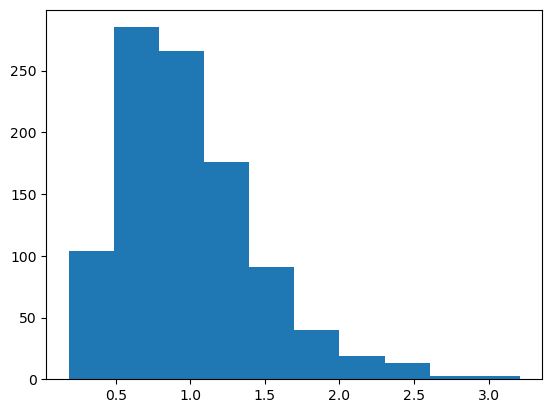

In [12]:
plt.hist(er_dists)

# 💨 `evo` test

In [4]:
from synthetic.commands.evo import *

In [5]:
from synthetic.distances import Norm

In [5]:
#netfile = "data/data_2013/obs/words.gml"#../synteargs['inet']
netfile = "space_seg/data/data_v2/v100_e552/PA/k_1.pickle"#../synteargs['inet']
outdir = "data/pgcl_tests/degs_k/"#args['odir']
generations = DEFAULT_GENERATIONS#arg_with_default(args, 'gens', DEFAULT_GENERATIONS)
sr = DEFAULT_SAMPLE_RATE#arg_with_default(args, 'sr', DEFAULT_SAMPLE_RATE)
#bins = DEFAULT_BINS#arg_with_default(args, 'bins', DEFAULT_BINS)
#max_dist = DEFAULT_MAX_DIST#arg_with_default(args, 'maxdist', DEFAULT_MAX_DIST)
directed = False#not args['undir']
tolerance = DEFAULT_TOLERANCE#arg_with_default(args, 'tolerance', DEFAULT_TOLERANCE)
gen_type = DEFAULT_GEN_TYPE#arg_with_default(args, 'gentype', DEFAULT_GEN_TYPE)
#rw = args['rw']

In [7]:
# set the seed if given
if "seed" in args.keys():
    set_seed(args["seed"])

NameError: name 'args' is not defined

In [8]:
# load net
net = load_net(netfile, directed)

In [9]:
# create base generator
base_generator = create_generator(directed, gen_type)

In [10]:
# create fitness calculator
# TODO: norm samples configurable
print('computing target network statistics...')
deep_dist = DeepDistancesToNet(   
    net = net,# nx2dgl(net.graph.to_networkx().to_undirected()),
    #model = "./DL_module/saved/best_models/GraphMAE_GCNversion_o64/",
    model = "./DL_module/saved/best_models/trad_degs/",
    model_name = "GrMAE-vGCN",
    dist_type = "euclidean",
    norm = Norm.NONE,
    #norm_samples=1000,#DEFAULT_NORM_SAMPLES
)
#dists2net = DistancesToNet(net, get_stat_dist_types(args), bins, max_dist, rw, norm=Norm.ER_MEAN_RATIO,
 #                          norm_samples=DEFAULT_NORM_SAMPLES)

computing target network statistics...


In [13]:
# create evolutionary search
print('evolutionary search started...')
evo = Evo(net, deep_dist, generations, tolerance, base_generator, outdir, sr
          , 
         )

# run search
evo.run()

evolutionary search started...


Stable gens:   6%|▎   | 63/1000 [00:13<03:21,  4.65it/s, #=5, loss=7.75, size=7]/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/prog.py:384: RuntimeWarning: overflow encountered in double_scalars
  val = curnode.params[0].curval * curnode.params[1].curval
Stable gens: 100%|██| 1000/1000 [03:46<00:00,  4.41it/s, #=7, loss=7.48, size=6]

Done in 00:08:43. After 2342 generations.
Best found generator:
	(== 4 
 (LOG 0.9445694318084853) $dist $orig_deg)




In [23]:
deep_dist.compute(load_net("data/data_2013/synth/words-synth.edges", directed=False))

[0.9027203936540765]

In [24]:
deep_dist.compute(load_net("data/data_2013/obs/words.gml", directed=False))

[0.0]

In [51]:
from synthetic.net import Net
from dgl.heterograph import DGLHeteroGraph
from dgl import DGLGraph

In [54]:
for c in deep_dist.net.__class__.__mro__:
    print(c == Net)

True
False


In [55]:
nx2dgl(deep_dist.net.graph.to_networkx()).__class__.__mro__

(dgl.heterograph.DGLHeteroGraph, object)

In [56]:
for c in nx2dgl(deep_dist.net.graph.to_networkx()).__class__.__mro__:
    print(c == DGLGraph)

True
False


# Re-vamp Reproducibility `script`

In [1]:
from reproducibility.evolutionary_search import *
from reproducibility.evolutionary_search import _DEFAULT_ARGS

/Users/nmm/miniforge3/envs/env_gdl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
_OG_SEED = 0

In [49]:
#deep_exp_args = {
#    "model_path":'./DL_module/saved/best_models/GraphMAE_GCNversion_o64/',
#    'dist_type':'euclidean',
#}

args = {
    'data_path': 'space_seg/data/data_v2/v300_e3020/',#'space_seg/data/data_v2/v100_e552/',
    'data_folder': 'ID',
    'output_path': 'data/repro_pgcl_large/ID/',
    'directed': False,
    'n_rep': 10,
    'do_parallel': False,
    'n_processes': 1  
}

In [50]:
make_folder(args["output_path"])

nets_files = ["id_{}.pickle".format(i+1) 
              for i in range(3)
             ]
nets_paths = [args["data_path"]+args["data_folder"]+"/"+f for f in nets_files]
print(nets_paths)

output_exp = args["output_path"]+"{exp_name}"

['space_seg/data/data_v2/v300_e3020/ID/id_1.pickle', 'space_seg/data/data_v2/v300_e3020/ID/id_2.pickle', 'space_seg/data/data_v2/v300_e3020/ID/id_3.pickle']


In [51]:
experiments = []

for flnm, path in zip(nets_files, nets_paths): # for each network of the experiment

    # load the network
    #net = comprehensive_load_net(path, args["directed"])
    exp = flnm.split(".")[0]
    experiments += [exp]
    
    output_exp = args["output_path"]+"{exp_name}".format(exp_name=exp)
    
    exp_args = {
        "inet":path,
        "odir":output_exp,
        "undir": not args["directed"],
        "gens":100,#DEFAULT_GENERATIONS,
        "sr":DEFAULT_SAMPLE_RATE,
        "tolerance":DEFAULT_TOLERANCE,
        "gentype":DEFAULT_GEN_TYPE,
        # deep here 
        "model_path":'./DL_module/saved/best_models/PGCL/',
        "dist_type":'euclidean',
    }
    
    # --> multi runs
    
    multievo = MutliEvolve("multievo")
    

    # 🏃 run experiments
    multievo.run(
        args = exp_args,
        n_reps = args["n_rep"],
        n_processes = args["n_processes"],
        og_seed = _OG_SEED, 
        do_parallel = args["do_parallel"],
        #old_netfile = oldfile,
    )

🌱 Setting seed to 0
Initialising distance metric...
🌱 Setting seed to 0


Stable gens: 100%|█| 100/100 [09:27<00:00,  5.68s/it, #=5, loss=0.00168, size=23


Done in 00:13:35. After 145 generations.
Best found generator:
	(ABS 
 (< $targ 
  (> 0 
   (/ 
    (* 
     (> $dist 0.9995333373869157 $orig_deg $orig) 
     (EXP 2)) $targ_deg) 0.4368939103819883 0.699966086679833) 
  (^ $orig_deg $dist) 
  (* 0.8490766297034003 $targ)))


🌱 Setting seed to 1


Stable gens: 100%|█| 100/100 [08:38<00:00,  5.19s/it, #=7, loss=0.00266, size=9]


Done in 00:14:35. After 172 generations.
Best found generator:
	(+ 
 (MAX $targ $orig_deg) 
 (== 4 $targ 0.9013202172037503 $targ_deg))


🌱 Setting seed to 2


Stable gens: 100%|█| 100/100 [08:31<00:00,  5.12s/it, #=4, loss=0.00244, size=6]


Done in 00:22:17. After 261 generations.
Best found generator:
	(== 
 (LOG $orig_deg) $targ_deg 1 $targ)


🌱 Setting seed to 3


Stable gens: 100%|█| 100/100 [07:53<00:00,  4.73s/it, #=5, loss=0.00397, size=3]


Done in 00:14:24. After 183 generations.
Best found generator:
	(MAX $orig 4)


🌱 Setting seed to 4


Stable gens: 100%|█| 100/100 [08:35<00:00,  5.16s/it, #=10, loss=0.00363, size=1


Done in 00:28:02. After 322 generations.
Best found generator:
	(ZER 
 (AFF $targ 0.5973339439328592 $dist) 
 (ABS $orig) 
 (> 0.7670467377629946 $orig_deg 8 $targ_deg))


🌱 Setting seed to 5


Stable gens: 100%|█| 100/100 [09:15<00:00,  5.56s/it, #=9, loss=0.000656, size=1


Done in 00:14:50. After 164 generations.
Best found generator:
	(/ 
 (MAX $targ 
  (+ 
   (ZER 0.8220106043910862 9 0.49239533939950986) 
   (AFF $orig_deg 0.6161664250484888 0))) 1)


🌱 Setting seed to 6


Stable gens: 100%|█| 100/100 [08:44<00:00,  5.25s/it, #=5, loss=0.00357, size=9]


Done in 00:09:33. After 110 generations.
Best found generator:
	(* 
 (AFF $orig_deg 
  (MAX 0.7921403215561038 0.5158528867800386) 4) 
 (ABS $orig))


🌱 Setting seed to 7


Stable gens: 100%|█| 100/100 [08:00<00:00,  4.80s/it, #=12, loss=0.0013, size=3]


Done in 00:29:02. After 346 generations.
Best found generator:
	(MAX 0.4070447965835391 $targ)


🌱 Setting seed to 8


Stable gens: 100%|█| 100/100 [08:23<00:00,  5.04s/it, #=8, loss=0.00287, size=3]


Done in 00:11:54. After 141 generations.
Best found generator:
	(MAX $targ 5)


🌱 Setting seed to 9


Stable gens: 100%|█| 100/100 [07:54<00:00,  4.74s/it, #=2, loss=0.00337, size=1]


Done in 00:13:27. After 170 generations.
Best found generator:
	$orig


🌱 Setting seed to 0
Initialising distance metric...
🌱 Setting seed to 0


Stable gens: 100%|█| 100/100 [08:17<00:00,  4.98s/it, #=6, loss=0.00159, size=4]


Done in 00:13:42. After 164 generations.
Best found generator:
	(ABS 
 (MAX $targ $orig_deg))


🌱 Setting seed to 1


Stable gens: 100%|█| 100/100 [08:22<00:00,  5.02s/it, #=6, loss=0.00152, size=8]


Done in 00:16:18. After 199 generations.
Best found generator:
	(< $targ_deg 0.0 
 (LOG 1) 
 (MAX $orig 1))


🌱 Setting seed to 2


Stable gens: 100%|█| 100/100 [07:54<00:00,  4.74s/it, #=3, loss=0.00154, size=1]


Done in 00:09:16. After 117 generations.
Best found generator:
	$orig


🌱 Setting seed to 3


Stable gens: 100%|█| 100/100 [07:55<00:00,  4.75s/it, #=8, loss=0.00133, size=1]


Done in 00:15:17. After 190 generations.
Best found generator:
	$targ


🌱 Setting seed to 4


Stable gens: 100%|█| 100/100 [09:33<00:00,  5.74s/it, #=9, loss=0.00198, size=17


Done in 00:11:36. After 123 generations.
Best found generator:
	(MIN 
 (- 
  (- $orig $targ_deg) 
  (MIN 0.1027775553106065 $orig)) 
 (* 
  (MIN $dist $orig) 
  (> 6 2 $orig 7)))


🌱 Setting seed to 5


Stable gens: 100%|█| 100/100 [08:12<00:00,  4.92s/it, #=4, loss=0.00237, size=1]


Done in 00:10:38. After 127 generations.
Best found generator:
	$targ


🌱 Setting seed to 6


Stable gens: 100%|█| 100/100 [08:23<00:00,  5.03s/it, #=10, loss=0.00158, size=6


Done in 00:18:57. After 207 generations.
Best found generator:
	(* $orig 
 (EXP 
  (MIN 0 0.0429580051545162)))


🌱 Setting seed to 7


Stable gens: 100%|█| 100/100 [08:23<00:00,  5.04s/it, #=10, loss=0.00109, size=1


Done in 00:17:35. After 199 generations.
Best found generator:
	$targ


🌱 Setting seed to 8


Stable gens: 100%|█| 100/100 [09:24<00:00,  5.64s/it, #=7, loss=0.00122, size=24


Done in 00:11:32. After 123 generations.
Best found generator:
	(MAX 
 (* $targ 0.41797584456034786) 
 (== 
  (ABS 
   (- 
    (< 0.0 2 $orig 0.8468595267877248) $dist)) 
  (ABS 0.0) 0.14833881804209936 
  (MIN 
   (MIN $targ_deg $targ_deg) 
   (ZER $orig_deg 0.05905305938495242 $dist))))


🌱 Setting seed to 9


Stable gens: 100%|█| 100/100 [09:45<00:00,  5.85s/it, #=6, loss=0.00121, size=23


Done in 00:25:32. After 279 generations.
Best found generator:
	(* 
 (/ 
  (> $targ 8 8 $orig) 
  (MAX 2 0.0)) 
 (> 
  (ABS $dist) 8 
  (* $targ 0) 
  (< 0.8165825247468967 
   (ABS 0.6864834229544469) $orig_deg $targ)))


🌱 Setting seed to 0
Initialising distance metric...
🌱 Setting seed to 0


Stable gens: 100%|█| 100/100 [08:17<00:00,  4.97s/it, #=5, loss=0.00151, size=1]


Done in 00:12:03. After 146 generations.
Best found generator:
	$targ


🌱 Setting seed to 1


Stable gens: 100%|█| 100/100 [08:33<00:00,  5.13s/it, #=4, loss=0.00153, size=11


Done in 00:12:42. After 150 generations.
Best found generator:
	(> 
 (ZER 0 4 0.21049910125926397) $targ 
 (MIN 0 0.4598541376262264) 
 (ABS $targ))


🌱 Setting seed to 2


Stable gens: 100%|█| 100/100 [08:12<00:00,  4.92s/it, #=7, loss=0.00136, size=1]


Done in 00:21:56. After 275 generations.
Best found generator:
	$targ


🌱 Setting seed to 3


Stable gens: 100%|█| 100/100 [08:24<00:00,  5.05s/it, #=6, loss=0.00167, size=1]


Done in 00:22:13. After 276 generations.
Best found generator:
	$targ


🌱 Setting seed to 4


Stable gens: 100%|█| 100/100 [08:12<00:00,  4.92s/it, #=14, loss=0.00142, size=1


Done in 00:17:56. After 208 generations.
Best found generator:
	$orig


🌱 Setting seed to 5


Stable gens: 100%|█| 100/100 [08:04<00:00,  4.84s/it, #=7, loss=0.00179, size=1]


Done in 00:13:05. After 158 generations.
Best found generator:
	$orig


🌱 Setting seed to 6


Stable gens: 100%|█| 100/100 [07:39<00:00,  4.59s/it, #=14, loss=0.00162, size=1


Done in 00:11:07. After 141 generations.
Best found generator:
	$orig


🌱 Setting seed to 7


Stable gens: 100%|█| 100/100 [07:56<00:00,  4.77s/it, #=14, loss=0.00118, size=2


Done in 00:38:51. After 455 generations.
Best found generator:
	(ABS $orig)


🌱 Setting seed to 8


Stable gens: 100%|█| 100/100 [09:16<00:00,  5.57s/it, #=14, loss=0.000653, size=


Done in 00:24:00. After 259 generations.
Best found generator:
	(MAX 
 (/ 0.9047152684660515 1) 
 (== 
  (ABS 
   (- 
    (< 0.0 0.6706080825327332 $orig 0.8468595267877248) 9)) 
  (ABS 0.0) 
  (< 
   (MIN 
    (MAX $orig 
     (MIN $targ_deg $targ_deg)) 0.515474769027155) 4 $orig 4) $orig))


🌱 Setting seed to 9


Stable gens: 100%|█| 100/100 [08:23<00:00,  5.03s/it, #=4, loss=0.00199, size=4]

Done in 00:15:03. After 181 generations.
Best found generator:
	(AFF 4 $dist $orig)




---

In [46]:
#deep_exp_args = {
#    "model_path":'./DL_module/saved/best_models/GraphMAE_GCNversion_o64/',
#    'dist_type':'euclidean',
#}

args = {
    'data_path': 'space_seg/data/data_v2/v300_e3020/',#'space_seg/data/data_v2/v100_e552/',
    'data_folder': 'ID',
    'output_path': 'data/repro_degs_large/ID/',
    'directed': False,
    'n_rep': 10,
    'do_parallel': False,
    'n_processes': 1  
}

In [47]:
make_folder(args["output_path"])

nets_files = ["id_{}.pickle".format(i+1) 
              for i in range(3)
             ]
nets_paths = [args["data_path"]+args["data_folder"]+"/"+f for f in nets_files]
print(nets_paths)

output_exp = args["output_path"]+"{exp_name}"

['space_seg/data/data_v2/v300_e3020/ID/id_1.pickle', 'space_seg/data/data_v2/v300_e3020/ID/id_2.pickle', 'space_seg/data/data_v2/v300_e3020/ID/id_3.pickle']


In [48]:
experiments = []

for flnm, path in zip(nets_files, nets_paths): # for each network of the experiment

    # load the network
    #net = comprehensive_load_net(path, args["directed"])
    exp = flnm.split(".")[0]
    experiments += [exp]
    
    output_exp = args["output_path"]+"{exp_name}".format(exp_name=exp)
    
    exp_args = {
        "inet":path,
        "odir":output_exp,
        "undir": not args["directed"],
        "gens":100,#DEFAULT_GENERATIONS,
        "sr":DEFAULT_SAMPLE_RATE,
        "tolerance":DEFAULT_TOLERANCE,
        "gentype":DEFAULT_GEN_TYPE,
        # deep here 
        "model_path":'./DL_module/saved/best_models/trad_degs/',
        "dist_type":'euclidean',
    }
    
    # --> multi runs
    
    multievo = MutliEvolve("multievo")
    

    # 🏃 run experiments
    multievo.run(
        args = exp_args,
        n_reps = args["n_rep"],
        n_processes = args["n_processes"],
        og_seed = _OG_SEED, 
        do_parallel = args["do_parallel"],
        #old_netfile = oldfile,
    )

🌱 Setting seed to 0
Initialising distance metric...
🌱 Setting seed to 0


Stable gens: 100%|██████| 100/100 [07:46<00:00,  4.67s/it, #=6, loss=23, size=1]


Done in 00:15:19. After 186 generations.
Best found generator:
	$targ_deg


🌱 Setting seed to 1


Stable gens: 100%|████| 100/100 [08:35<00:00,  5.16s/it, #=7, loss=20.7, size=8]


Done in 00:21:01. After 229 generations.
Best found generator:
	(+ 
 (MAX 
  (* 
   (LOG $orig_deg) 0.8087585695894204) $targ_deg) $orig)


🌱 Setting seed to 2


Stable gens: 100%|████| 100/100 [08:37<00:00,  5.18s/it, #=7, loss=20.1, size=1]


Done in 00:19:46. After 228 generations.
Best found generator:
	$targ


🌱 Setting seed to 3


Stable gens: 100%|████| 100/100 [07:49<00:00,  4.69s/it, #=4, loss=22.2, size=1]


Done in 00:08:39. After 110 generations.
Best found generator:
	$orig_deg


🌱 Setting seed to 4


Stable gens: 100%|███| 100/100 [10:11<00:00,  6.11s/it, #=6, loss=21.3, size=23]


Done in 00:19:03. After 190 generations.
Best found generator:
	(== 8 
 (< 
  (/ $orig $orig) 0.0 0.027327012460956257 0.6703324517407693) $dist 
 (MAX $orig 
  (AFF 
   (== $dist $dist $orig_deg 0.7994057077022197) 
   (ZER 3 0.0 $targ) 0.27336009165762)))


🌱 Setting seed to 5


Stable gens: 100%|██| 100/100 [09:29<00:00,  5.70s/it, #=12, loss=19.3, size=16]


Done in 00:42:28. After 456 generations.
Best found generator:
	(== 
 (AFF 
  (ABS $orig_deg) 
  (+ $targ_deg 0.0) 
  (* 0.5448926453543632 $orig_deg)) $orig 
 (ZER $dist 0.6887866188273145 0.9044528093154133) $orig)


🌱 Setting seed to 6


Stable gens: 100%|███| 100/100 [08:23<00:00,  5.03s/it, #=7, loss=18.5, size=10]


Done in 00:21:55. After 262 generations.
Best found generator:
	(ZER 
 (+ 0 $dist) 
 (/ $orig_deg 4) 
 (- $orig 7))


🌱 Setting seed to 7


Stable gens: 100%|███| 100/100 [09:32<00:00,  5.72s/it, #=7, loss=19.9, size=13]


Done in 00:28:03. After 307 generations.
Best found generator:
	(ZER 
 (/ 
  (EXP $targ_deg) $orig) 9 
 (MAX 
  (* 0.1772412858429997 $orig_deg) 
  (MIN 0.8504072469484404 $orig_deg)))


🌱 Setting seed to 8


Stable gens: 100%|██| 100/100 [08:44<00:00,  5.24s/it, #=10, loss=19.9, size=10]


Done in 00:12:29. After 142 generations.
Best found generator:
	(MAX 
 (+ 
  (ABS $orig_deg) 
  (- $orig $orig_deg)) 
 (- 7 4))


🌱 Setting seed to 9


Stable gens: 100%|████| 100/100 [07:52<00:00,  4.73s/it, #=7, loss=21.2, size=1]


Done in 00:14:09. After 180 generations.
Best found generator:
	$orig


🌱 Setting seed to 0
Initialising distance metric...
🌱 Setting seed to 0


Stable gens: 100%|████| 100/100 [08:07<00:00,  4.88s/it, #=8, loss=19.3, size=1]


Done in 00:37:52. After 452 generations.
Best found generator:
	$orig


🌱 Setting seed to 1


Stable gens: 100%|███| 100/100 [08:00<00:00,  4.80s/it, #=10, loss=19.3, size=1]


Done in 00:31:46. After 392 generations.
Best found generator:
	$targ


🌱 Setting seed to 2


Stable gens: 100%|███| 100/100 [08:48<00:00,  5.28s/it, #=8, loss=15.8, size=16]


Done in 00:45:52. After 560 generations.
Best found generator:
	(< 
 (^ 
  (MAX $orig $orig_deg) 0.0) 2 $orig 
 (MIN 
  (- $orig $orig_deg) 
  (AFF 0.7225026258283821 $orig $targ)))


🌱 Setting seed to 3


Stable gens: 100%|████| 100/100 [07:42<00:00,  4.63s/it, #=7, loss=18.3, size=1]


Done in 00:20:03. After 257 generations.
Best found generator:
	$orig


🌱 Setting seed to 4


Stable gens: 100%|████| 100/100 [07:55<00:00,  4.76s/it, #=6, loss=19.5, size=5]


Done in 00:11:58. After 148 generations.
Best found generator:
	(+ 
 (^ $targ_deg 0.42950886938458) $targ)


🌱 Setting seed to 5


Stable gens: 100%|████| 100/100 [07:59<00:00,  4.80s/it, #=7, loss=18.4, size=1]


Done in 00:13:55. After 172 generations.
Best found generator:
	$orig


🌱 Setting seed to 6


Stable gens: 100%|███| 100/100 [08:40<00:00,  5.20s/it, #=4, loss=18.9, size=12]


Done in 00:12:09. After 143 generations.
Best found generator:
	(ZER 
 (== $orig_deg 7 $dist $targ) 
 (MAX $targ_deg 4) 
 (+ $orig_deg $targ))


🌱 Setting seed to 7


Stable gens: 100%|████| 100/100 [07:56<00:00,  4.77s/it, #=9, loss=18.5, size=1]


Done in 00:26:56. After 346 generations.
Best found generator:
	$targ


🌱 Setting seed to 8


Stable gens: 100%|████| 100/100 [07:52<00:00,  4.73s/it, #=6, loss=19.7, size=1]


Done in 00:16:56. After 213 generations.
Best found generator:
	$targ


🌱 Setting seed to 9


Stable gens: 100%|████| 100/100 [07:46<00:00,  4.66s/it, #=5, loss=19.9, size=1]


Done in 00:15:33. After 197 generations.
Best found generator:
	$orig


🌱 Setting seed to 0
Initialising distance metric...
🌱 Setting seed to 0


Stable gens: 100%|███| 100/100 [09:00<00:00,  5.41s/it, #=5, loss=14.2, size=16]


Done in 00:30:16. After 328 generations.
Best found generator:
	(ABS 
 (MAX 
  (+ $targ 0.7629285077348703) 
  (/ 
   (MAX 
    (== $targ_deg $orig $dist $dist) 
    (* 0.12647752646906518 0.3699775488669744)) 6)))


🌱 Setting seed to 1


Stable gens: 100%|████| 100/100 [07:57<00:00,  4.78s/it, #=6, loss=16.2, size=1]


Done in 00:11:31. After 143 generations.
Best found generator:
	$orig


🌱 Setting seed to 2


Stable gens: 100%|████| 100/100 [07:47<00:00,  4.68s/it, #=2, loss=15.7, size=1]


Done in 00:12:38. After 160 generations.
Best found generator:
	$targ


🌱 Setting seed to 3


Stable gens: 100%|████| 100/100 [08:05<00:00,  4.85s/it, #=2, loss=14.7, size=4]


Done in 00:14:37. After 181 generations.
Best found generator:
	(+ $orig_deg 
 (ABS $orig))


🌱 Setting seed to 4


Stable gens: 100%|███| 100/100 [07:54<00:00,  4.75s/it, #=12, loss=17.3, size=1]


Done in 00:24:16. After 312 generations.
Best found generator:
	$orig


🌱 Setting seed to 5


Stable gens: 100%|████| 100/100 [08:29<00:00,  5.10s/it, #=14, loss=17, size=11]


Done in 00:42:57. After 487 generations.
Best found generator:
	(ABS 
 (> $targ 0.12190721111411063 
  (ABS $targ) 
  (> 4 0.39348300553426596 $dist 1)))


🌱 Setting seed to 6


Stable gens: 100%|████| 100/100 [07:57<00:00,  4.78s/it, #=2, loss=13.9, size=1]


Done in 00:08:11. After 103 generations.
Best found generator:
	$orig


🌱 Setting seed to 7


Stable gens: 100%|██████| 100/100 [07:45<00:00,  4.66s/it, #=6, loss=16, size=6]


Done in 00:19:43. After 241 generations.
Best found generator:
	(LOG 
 (== $targ_deg $orig $orig_deg $targ_deg))


🌱 Setting seed to 8


Stable gens: 100%|███| 100/100 [09:15<00:00,  5.56s/it, #=3, loss=17.7, size=17]


Done in 00:09:35. After 104 generations.
Best found generator:
	(MAX 
 (* $targ 0.41797584456034786) 
 (== 
  (ABS 
   (- 7 $dist)) 
  (ABS 0.0) 
  (EXP 
   (AFF 5 8 $orig_deg)) $orig))


🌱 Setting seed to 9


Stable gens: 100%|████| 100/100 [08:12<00:00,  4.93s/it, #=3, loss=18.9, size=1]

Done in 00:14:24. After 176 generations.
Best found generator:
	$orig




---

## Trad-method (2014)

In [55]:
#deep_exp_args = {
#    "model_path":'./DL_module/saved/best_models/GraphMAE_GCNversion_o64/',
#    'dist_type':'euclidean',
#}

args = {
    'data_path': 'space_seg/data/data_v2/v300_e3020/',#'space_seg/data/data_v2/v100_e552/',
    'data_folder': 'ER',
    'output_path': 'data/repro_trad_large/ER/',
    'directed': False,
    'n_rep': 10,
    'do_parallel': True,
    'n_processes': 2, 
}

In [56]:
make_folder(args["output_path"])

nets_files = ["c1_{}.pickle".format(i+1) 
              for i in range(3)
             ]
nets_paths = [args["data_path"]+args["data_folder"]+"/"+f for f in nets_files]
print(nets_paths)

output_exp = args["output_path"]+"{exp_name}"

['space_seg/data/data_v2/v300_e3020/ER/c1_1.pickle', 'space_seg/data/data_v2/v300_e3020/ER/c1_2.pickle', 'space_seg/data/data_v2/v300_e3020/ER/c1_3.pickle']


In [ ]:
experiments = []

for flnm, path in zip(nets_files, nets_paths): # for each network of the experiment

    # load the network
    #net = comprehensive_load_net(path, args["directed"])
    exp = flnm.split(".")[0]
    experiments += [exp]
    
    output_exp = args["output_path"]+"{exp_name}".format(exp_name=exp)
    
    exp_args = {
        "inet":path,
        "odir":output_exp,
        "undir": not args["directed"],
        "gens":100,#DEFAULT_GENERATIONS,
        "sr":DEFAULT_SAMPLE_RATE,
        "tolerance":DEFAULT_TOLERANCE,
        "gentype":DEFAULT_GEN_TYPE,
        ## trad here
        
        "bins":DEFAULT_BINS,
        "maxdist":DEFAULT_MAX_DIST,
        "rw":True,
        
        ## deep here 
        
        #"model_path":'./DL_module/saved/best_models/GraphMAE_GCNversion_o64/',
        #"dist_type":'euclidean',
        
    }
    
    # --> multi runs
    
    multievo = MutliEvolve("multievo")
    

    # 🏃 run experiments
    multievo.run(
        args = exp_args,
        n_reps = args["n_rep"],
        n_processes = args["n_processes"],
        og_seed = _OG_SEED, 
        do_parallel = args["do_parallel"],
        #old_netfile = oldfile,
    )

🌱 Setting seed to 0
Initialising distance metric...


  0% (0 of 1000) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

computing normalization samples...


100% (1000 of 1000) |####################| Elapsed Time: 0:49:14 Time:  0:49:14


2954.07s
🌱 Setting seed to 0
🌱 Setting seed to 2


Stable gens:   6%|▌         | 6/100 [00:45<11:40,  7.46s/it, #=4, loss=0.726, size=1]/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/generator.py:184: RuntimeWarning: overflow encountered in double_scalars
  total_weight += weight
/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/generator.py:196: RuntimeWarning: overflow encountered in double_scalars
  total_weight += self.sample_weights[i]
Stable gens:  37%|███▋      | 37/100 [05:05<08:15,  7.87s/it, #=1, loss=0.548, size=8]/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/generator.py:196: RuntimeWarning: overflow encountered in double_scalars
  total_weight += self.sample_weights[i]
/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/generator.py:184: RuntimeWarning: overflow encountered in double_scalars
  total_weight += weight
Stable gens:  74%|███████▍  | 74/100 [09:36<03:19,  7.66s/it, #=5, loss=0.532, size=1]/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/prog.py:384: RuntimeWarning: overflow encountered

Done in 00:15:33. After 114 generations.
Best found generator:
	(MIN 
 (EXP 0.11995054259638982) 
 (== $targ_deg 0.11619331759609963 $dist $targ))


🌱 Setting seed to 3


Stable gens:   9%|▉         | 9/100 [01:19<14:33,  9.60s/it, #=1, loss=0.8, size=2]

Done in 00:17:29. After 134 generations.
Best found generator:
	1


🌱 Setting seed to 1


Stable gens:   6%|▌         | 6/100 [00:43<11:19,  7.23s/it, #=3, loss=0.667, size=1]

Done in 00:14:59. After 116 generations.
Best found generator:
	0.9032154078663401


🌱 Setting seed to 4


Stable gens:  78%|███████▊  | 78/100 [10:29<02:52,  7.86s/it, #=3, loss=0.638, size=1]

Done in 00:31:27. After 234 generations.
Best found generator:
	0.7523095348360808


🌱 Setting seed to 6


Stable gens:  10%|█         | 10/100 [01:17<11:39,  7.77s/it, #=6, loss=0.661, size=1]

Done in 00:17:09. After 127 generations.
Best found generator:
	0.6249308440640977


🌱 Setting seed to 5


Stable gens:  26%|██▌       | 26/100 [03:31<09:57,  8.08s/it, #=3, loss=0.59, size=1]]/Users/nmm/Desktop/CMB_CSS_PDM/main_project/synthetic/prog.py:384: RuntimeWarning: overflow encountered in double_scalars
  val = curnode.params[0].curval * curnode.params[1].curval
Stable gens:  32%|███▏      | 32/100 [04:28<09:43,  8.59s/it, #=6, loss=0.661, size=1]

Done in 00:15:35. After 116 generations.
Best found generator:
	5


🌱 Setting seed to 8


Stable gens:  48%|████▊     | 48/100 [06:44<07:08,  8.25s/it, #=6, loss=0.661, size=1]

In [32]:
found_generators[0].prog.varcount

print(found_generators[0].prog)

$orig_deg


# Assess solutions

In [1]:
from os import listdir
from synthetic.generator import load_generator

## PA

In [24]:
family = "PA"
net_name = "k"

solutions = [
    "$targ_deg",
    "$orig_deg",
]

### - trad2014

In [35]:
experiments_name = "repro_trad"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    str(gen.prog) in solutions 
    for gen in found_generators
]

print('(min) accuracy : {} \n'.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]
                        )
         )

(min) accuracy : 0.5666666666666667 

	 0.2
>(LOG 
 (< $targ $targ_deg 0.5630878111618418 $orig_deg))
>complex  ...
>complex  ...
>complex  ...
>$orig_deg ✅
>complex  ...
>complex  ...
>complex  ...
>complex  ...
>$orig_deg ✅
	 0.7
>$targ_deg ✅
>$orig_deg ✅
>complex  ...
>(ZER 
 (> 0.8962930889334381 0.0 $targ_deg $targ) 0.13393212979265146 $targ_deg)
>$orig_deg ✅
>$orig_deg ✅
>$orig_deg ✅
>$targ_deg ✅
>complex  ...
>$targ_deg ✅
	 0.8
>$targ_deg ✅
>$targ_deg ✅
>$targ_deg ✅
>$orig_deg ✅
>$orig_deg ✅
>$orig_deg ✅
>$orig_deg ✅
>complex  ...
>complex  ...
>$targ_deg ✅


### - GraphMAE

In [32]:
experiments_name = "repro_GraphMAE"#"repro_tests_GraphMAE_GCN64"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    np.any([str(gen.prog)== s for s in solutions])
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.43333333333333335 
	 0.3
>complex  ...
>complex  ...
>complex  ...
>complex  ...
>complex  ...
>$targ_deg ✅
>$targ_deg ✅
>complex  ...
>$targ_deg ✅
>(ABS $orig_deg)
	 0.3
>$targ_deg ✅
>(ABS $orig)
>(MIN $targ_deg 6.0)
>complex  ...
>$orig_deg ✅
>$orig_deg ✅
>complex  ...
>(MAX 
 (* 
  (MAX 9.0 $orig_deg) 
  (LOG 0.7684863459081664)) $targ_deg)
>complex  ...
>complex  ...
	 0.7
>complex  ...
>$orig_deg ✅
>(== 0.0 
 (LOG 
  (> 4.0 $orig 0.8955189272493391 $dist)) 1.0 $targ_deg)
>$targ_deg ✅
>$orig_deg ✅
>$targ_deg ✅
>$targ_deg ✅
>$targ_deg ✅
>complex  ...
>$targ_deg ✅


### -PGCL

In [11]:
experiments_name = "repro_tests_PGCL_default"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    np.any([str(gen.prog)== s for s in solutions])
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.36666666666666664 
	 0.3
>complex  ...
>complex  ...
>$targ_deg ✅
>$orig_deg ✅
>$targ_deg ✅
>(< $targ_deg $orig $orig_deg 0.6081904868003982)
>complex  ...
>(MIN 
 (ABS 6.0) 
 (/ $orig_deg 1.0))
>complex  ...
>(< $targ 1.0 
 (- 0.6149328786946264 0.0) $targ_deg)
	 0.3
>$orig_deg ✅
>$orig_deg ✅
>$targ_deg ✅
>(AFF 0.5323141661669061 
 (* $targ_deg 
  (AFF 0.9725475006899634 4.0 $dist)) $orig_deg)
>complex  ...
>(* 
 (- $orig_deg 0.0) 
 (* 0.3710584454782444 6.0))
>(ZER 
 (ABS 8.0) 
 (MIN 8.0 $dist) 
 (/ $targ_deg 0.32699630745741837))
>complex  ...
>complex  ...
>complex  ...
	 0.5
>$targ_deg ✅
>$orig_deg ✅
>$targ_deg ✅
>(+ 
 (* 0.777900970652204 
  (- 0.09059686539036582 0.9203397385735443)) $targ_deg)
>(* $orig 
 (ABS $orig_deg))
>(- 
 (< 3.0 $orig $orig_deg 1.0) 
 (/ $targ_deg $orig))
>complex  ...
>$orig_deg ✅
>$targ_deg ✅
>(* 
 (ABS 
  (ABS $targ_deg)) $targ)


### - trad_degs

In [25]:
experiments_name = "repro_degs"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    str(gen.prog) in solutions 
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.4666666666666667 
	 0.6
>$orig_deg ✅
>$targ_deg ✅
>$targ_deg ✅
>$targ_deg ✅
>$targ
>$targ
>$targ_deg ✅
>$orig_deg ✅
>$orig
>(ABS $orig_deg)
	 0.2
>$targ
>(MAX 
 (LOG $orig_deg) 0.15222411872152886)
>(EXP 
 (* $dist $targ))
>$targ_deg ✅
>$targ_deg ✅
>(LOG 
 (< $targ_deg $dist 0.5517672327874554 $targ_deg))
>(/ $targ_deg 0.5824088484514027)
>complex  ...
>$targ
>$targ
	 0.6
>$targ_deg ✅
>complex  ...
>$orig_deg ✅
>$orig_deg ✅
>$targ_deg ✅
>complex  ...
>$orig_deg ✅
>$targ_deg ✅
>complex  ...
>complex  ...


## Dist

In [35]:
family = "d"
net_name = "d"

solutions = [
    "$dist"
]

### - trad2014

In [39]:
experiments_name = "repro_trad"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    str(gen.prog) in solutions 
    for gen in found_generators
]

print('(min) accuracy : {} \n'.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]
                        )
         )

(min) accuracy : 0.4 

	 0.4
>complex  ...
>$dist ✅
>(ABS 0.70451004089427)
>(- 
 (LOG 
  (AFF 0.21831551102524593 $dist 0.10870321858133414)) 
 (LOG 
  (MAX 0.6415513964577548 $targ_deg)))
>(* $dist 0.965884506413521)
>complex  ...
>$dist ✅
>(- $dist $targ_deg)
>$dist ✅
>$dist ✅
	 0.4
>complex  ...
>complex  ...
>$dist ✅
>complex  ...
>complex  ...
>complex  ...
>$dist ✅
>0.45703419764528164
>$dist ✅
>$dist ✅
	 0.4
>$dist ✅
>(MIN 
 (LOG 
  (* 0.20006982172071697 $dist)) $orig)
>complex  ...
>$dist ✅
>$dist ✅
>complex  ...
>(LOG 
 (* 0.1706467438932252 $dist))
>(ABS 
 (- 0.6437040272241183 $dist))
>complex  ...
>$dist ✅


### - deep

In [17]:
experiments_name = "repro_GraphMAE"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    np.any([str(gen.prog)== s for s in solutions])
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.1 
	 0.3
>$dist ✅
>complex  ...
>0.370492631292633
>(AFF 0.06923328846930987 $dist $dist)
>(- 
 (EXP 
  (ABS 7.0)) $targ_deg)
>(AFF 0.23226442080326992 $dist 0.27416068784018977)
>$dist ✅
>complex  ...
>$dist ✅
>complex  ...
	 0.0
>(* 
 (ABS 0.48190890267933395) 
 (AFF 0.0 9.0 $targ_deg))
>complex  ...
>(LOG 
 (/ 
  (ABS 
   (ABS $dist)) 
  (LOG 0.9555181153873274)))
>complex  ...
>complex  ...
>complex  ...
>8.0
>0.31336274662913266
>7.0
>0.14471495107819
	 0.0
>(^ 9.0 $dist)
>complex  ...
>(/ 0.6563037191500235 
 (* $orig_deg $orig_deg))
>(EXP $dist)
>complex  ...
>(^ 
 (AFF $orig $dist $dist) 
 (ABS 9.0))
>complex  ...
>complex  ...
>complex  ...
>(EXP $dist)


### - PGCL

In [22]:
experiments_name = "repro_tests_PGCL_default"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    np.any([str(gen.prog)== s for s in solutions])
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.0 
	 0.0
>(EXP $dist)
>(> $targ $orig_deg 
 (EXP $dist) $targ_deg)
>complex  ...
>complex  ...
>complex  ...
>complex  ...
>complex  ...
>complex  ...
>(- 
 (LOG 
  (MAX $orig $targ)) $orig_deg)
>(ZER 
 (- $orig 5.0) 
 (LOG $targ) 
 (EXP $dist))
	 0.0
>(EXP 4.0)
>0.019790789239828244
>complex  ...
>(EXP 
 (^ 
  (+ 0.8675691903185135 $orig_deg) 
  (MAX $orig $dist)))
>complex  ...
>(/ 
 (+ 0.8749706783233451 0.5671930451328301) $targ_deg)
>complex  ...
>7.0
>(LOG 
 (> $dist 9.0 $targ 0.23534934077493297))
>complex  ...
	 0.0
>(^ 6.0 $dist)
>complex  ...
>(EXP 
 (* $dist $dist))
>complex  ...
>(- 
 (MAX $orig_deg $dist) 
 (+ 0.48507816508041324 $orig_deg))
>complex  ...
>(EXP 
 (/ $dist $orig_deg))
>(EXP $dist)
>(^ 
 (+ 0.06112819909842515 $dist) 
 (ABS 
  (EXP 2.0)))
>complex  ...


### - trad_degs

In [36]:
experiments_name = "repro_degs"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    str(gen.prog) in solutions 
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.2 
	 0.2
>complex  ...
>complex  ...
>complex  ...
>$dist ✅
>(- 
 (EXP 
  (+ $dist $dist)) $targ_deg)
>(ZER 2.0 
 (- 0.16510513544759986 $targ_deg) 0.04338762474714952)
>(- $dist 
 (< $dist 
  (EXP $orig_deg) 0.15726705567391852 0.2394410211835568))
>$dist ✅
>complex  ...
>2.0
	 0.0
>4.0
>(LOG 
 (EXP 
  (+ 9.0 
   (AFF $dist 2.0 $orig_deg))))
>(MIN 
 (ABS 0.0) 
 (== 3.0 5.0 $orig_deg $dist))
>7.0
>complex  ...
>3.0
>(- 3.0 
 (* 0.8898938095544907 $orig_deg))
>complex  ...
>0.6709174415640031
>6.0
	 0.4
>(+ 
 (< 0.4693909039343319 
  (- $orig_deg 9.0) $dist 
  (EXP 4.0)) $orig_deg)
>(EXP 
 (+ $dist 0.0))
>$dist ✅
>(/ 
 (EXP $dist) $targ_deg)
>complex  ...
>$dist ✅
>$dist ✅
>$dist ✅
>(- 6.0 $orig_deg)
>(== 3.0 $targ_deg 2.0 
 (EXP 
  (* $dist 2.0)))


## ID

In [30]:
family = "ID"
net_name = "id"

solutions = [
    "$orig",
    "$targ"
]

### - trad2014

In [52]:
experiments_name = "repro_trad"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    str(gen.prog) in solutions 
    for gen in found_generators
]

print('(min) accuracy : {} \n'.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]
                        )
         )

(min) accuracy : 0.4 

	 0.3
>complex  ...
>complex  ...
>$orig ✅
>(ABS $orig)
>$orig ✅
>$orig ✅
>complex  ...
>(+ $orig $targ)
>(ABS 
 (MAX 
  (- 3.0 9.0) 
  (MAX $orig 0.7998203710791895)))
>(< $orig $dist 0.015913299392807834 $orig)
	 0.5
>$targ ✅
>(MAX 
 (< $orig 0.27514802559344054 $orig_deg $targ) 
 (- $targ $targ_deg))
>$orig ✅
>(AFF 
 (MAX $targ_deg 4.0) 0.819334492913819 $orig)
>complex  ...
>(+ 
 (LOG 
  (MIN 5.0 $dist)) $targ)
>$orig ✅
>$orig ✅
>complex  ...
>$targ ✅
	 0.4
>$orig ✅
>(MIN $targ_deg 
 (LOG $targ))
>complex  ...
>$orig ✅
>$orig ✅
>complex  ...
>(- 
 (* 0.5109566688937679 $targ) 
 (ABS 0.4659361059538505))
>complex  ...
>$orig ✅
>complex  ...


### - deep

In [16]:
experiments_name = "repro_tests_GraphMAE_GCN64"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    np.any([str(gen.prog)== s for s in solutions])
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.16666666666666666 
	 0.4
>(LOG 0.6983217639090424)
>$dist ✅
>$dist ✅
>complex  ...
>(ABS 
 (EXP $dist))
>complex  ...
>0.0
>$dist ✅
>complex  ...
>$dist ✅
	 0.1
>0.0
>(< $targ_deg $targ_deg $targ_deg 6.0)
>5.0
>3.0
>0.0
>(^ 0.14472550368236303 1.0)
>0.47761318352573257
>5.0
>0.9337970487265437
>$dist ✅
	 0.0
>(EXP 
 (EXP 
  (> $dist 
   (^ 0.9870715935834438 $targ) $dist $targ_deg)))
>complex  ...
>(* 
 (MIN 9.0 
  (== 0.0 5.0 0.7969805697825564 $dist)) $dist)
>complex  ...
>(EXP $dist)
>(/ 
 (ABS 
  (EXP $dist)) 0.7253086007192432)
>(ZER 
 (- 
  (EXP 0.0) 0.864660051757049) $dist 
 (EXP $dist))
>complex  ...
>(ABS 
 (EXP 
  (MAX 0.8123188879803044 $dist)))
>complex  ...


### - PGCL

In [16]:
experiments_name = "repro_tests_PGCL_default"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    np.any([str(gen.prog)== s for s in solutions])
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.3333333333333333 
	 0.6
>$targ ✅
>(MAX $orig 
 (^ 0.14499463989547523 0.34903830670608704))
>complex  ...
>$targ ✅
>$targ ✅
>$targ ✅
>(MAX 0.08207109172070193 $orig)
>$orig ✅
>$orig ✅
>complex  ...
	 0.1
>complex  ...
>complex  ...
>complex  ...
>(== $targ_deg $orig_deg 0.15719938338156492 $orig_deg)
>complex  ...
>(ABS 
 (* $targ 0.5823976837953363))
>complex  ...
>(MAX 
 (/ 0.4738877628741932 
  (+ $targ_deg 
   (- 0.36805985907156447 0.3514317940224986))) $targ)
>$targ ✅
>complex  ...
	 0.3
>complex  ...
>$orig ✅
>$orig ✅
>complex  ...
>complex  ...
>(- 
 (MAX $targ 7.0) 0.23499566357220159)
>$targ ✅
>(MAX 
 (/ 0.4738877628741932 0.5596512573894258) $targ)
>(- 
 (+ $orig_deg 5.0) 
 (== $targ $targ_deg $targ 0.9238540208281331))
>complex  ...


In [17]:
#1. O O X O O O O O O X
#2. X X X X X O X O O X
#3. X O O X X O O O X X
16/30

0.5333333333333333

### - trad_degs

In [31]:
experiments_name = "repro_degs"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

valid_generators = [
    str(gen.prog) in solutions 
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if np.any([str(gen.prog)== s for s in solutions])
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.4666666666666667 
	 0.5
>$targ ✅
>$targ ✅
>(+ 
 (/ 
  (< 0.0 0.07786583478577958 0.49534723261281466 $orig_deg) 
  (EXP $targ)) $targ)
>$targ ✅
>(MAX 
 (- 0.40768268769860905 0.42833775850210953) $orig)
>$orig ✅
>$targ ✅
>complex  ...
>complex  ...
>(< $targ 1.0 0.16677634653232143 
 (AFF $orig $dist $targ))
	 0.3
>complex  ...
>complex  ...
>complex  ...
>(* 
 (ABS $targ) 
 (ABS 
  (LOG 0.8906748955595893)))
>(LOG $orig_deg)
>$targ ✅
>complex  ...
>$orig ✅
>$orig_deg
>$orig ✅
	 0.6
>complex  ...
>(> 2.0 
 (ABS $orig_deg) 
 (EXP 
  (ZER 0.22606512423604475 9.0 $orig_deg)) 8.0)
>$orig ✅
>$targ ✅
>(ZER 0.8835773686521298 
 (LOG $orig_deg) 
 (ZER 0.0 $targ 0.278988521536887))
>$orig ✅
>$targ ✅
>$orig ✅
>$targ ✅
>complex  ...


## ER

In [2]:
family = "ER"
net_name = "c1"

def solution_assessment(prog_str:str):
    """ Returns True is string is a number. """
    try:
        float(prog_str)
        return True
    except ValueError:
        return False

### - trad20&4

In [7]:
experiments_name = "repro_trad"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

#valid_generators = [
#    np.any([str(gen.prog)== s for s in solutions])
#    for gen in found_generators
#]

valid_generators = [
    solution_assessment(str(gen.prog))
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if solution_assessment(str(gen.prog))
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.4 
	 0.3
>complex  ...
>(LOG 0.7254004589442619)
>complex  ...
>7.0 ✅
>3.0 ✅
>0.18326506820476995 ✅
>(EXP 
 (< 0.012219709343304408 0.0 0.502138542048856 8.0))
>$dist
>(^ 3.0 0.9734456817733799)
>complex  ...
	 0.3
>(* 0.7251608183840453 
 (LOG 0.1692368490686189))
>(^ 
 (+ 0.6011338531357928 0.038151250384159785) 
 (MIN 0.8280599020084767 $targ))
>complex  ...
>0.8962930889334381 ✅
>(LOG 
 (+ 0.16093498504357862 8.0))
>complex  ...
>0.6126441789261022 ✅
>0.8328499487745058 ✅
>complex  ...
>complex  ...
	 0.6
>0.956639917127919 ✅
>1.0 ✅
>complex  ...
>(+ 0.9934875765027612 0.0)
>2.0 ✅
>complex  ...
>0.017875896133014213 ✅
>0.29919014120805465 ✅
>7.0 ✅
>(< 
 (LOG 0.9648487056951133) $orig 0.16677634653232143 0.5033042732195364)


### - deep

In [20]:
experiments_name = "repro_GraphMAE"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

#valid_generators = [
#    np.any([str(gen.prog)== s for s in solutions])
#    for gen in found_generators
#]

valid_generators = [
    solution_assessment(str(gen.prog))
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if solution_assessment(str(gen.prog))
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.4 
	 0.5
>(^ 
 (^ 7.0 
  (^ 4.0 
   (EXP $dist))) 
 (ABS 0.5476748278460171))
>0.0 ✅
>0.5112997167662267 ✅
>7.0 ✅
>complex  ...
>3.0 ✅
>complex  ...
>$dist
>0.34425213634016116 ✅
>(ZER $orig $dist 0.8328459675260639)
	 0.2
>(+ 7.0 0.31355867258471526)
>(ABS 0.0)
>0.0 ✅
>0.39754611973067333 ✅
>complex  ...
>complex  ...
>(MIN 0.0 $orig)
>complex  ...
>complex  ...
>(ZER $targ 0.23837463869536402 0.2284264210335223)
	 0.5
>8.0 ✅
>5.0 ✅
>(- 
 (> 0.8041414331851717 4.0 $orig 0.30173878637509255) 
 (- 0.0 8.0))
>5.0 ✅
>complex  ...
>complex  ...
>(== 
 (MAX 0.6861094716661124 0.46685956508778115) 0.2609667039450826 
 (ABS 0.0) 
 (EXP 7.0))
>0.1256930375747065 ✅
>(/ 
 (* 9.0 0.0) 
 (< $orig_deg $orig_deg $dist $dist))
>0.6416205175740577 ✅


### - trad_degs

In [7]:
experiments_name = "repro_degs"

path_to_assess = "data/{}/{}/".format(experiments_name, family)

####

path_to_load = [
    path_to_assess+"{netname}_{netid}.{expid}".format(netname=net_name,netid=i+1,expid=j)+'/bestprog.txt'
    for i in range(3) for j in range(10) 
]

found_generators = [
    load_generator(path, directed=False, gen_type='exo')
    for path in path_to_load
]

#valid_generators = [
#    np.any([str(gen.prog)== s for s in solutions])
#    for gen in found_generators
#]

valid_generators = [
    solution_assessment(str(gen.prog))
    for gen in found_generators
]

print('(min) accuracy : {} '.format(np.sum(valid_generators)/len(valid_generators)))

for i in range(3):
    print("\t",np.sum(valid_generators[i*10:(i+1)*10])/10)
    print(">"+"\n>".join([str(gen.prog)+" ✅"
                          if solution_assessment(str(gen.prog))
                          else 'complex  ...' if gen.prog.size() > 10
                          else str(gen.prog)
                          for gen in found_generators[i*10:(i+1)*10]
                         ]))

(min) accuracy : 0.5666666666666667 
	 0.5
>0.08958408026233688 ✅
>(LOG 
 (MIN $orig_deg 0.5088738219734134))
>0.7883722764552863 ✅
>0.5852673471472217 ✅
>complex  ...
>(ZER 0.11515007407037459 4.0 6.0)
>(+ 
 (MAX 8.0 $orig_deg) 
 (AFF 0.11213782695381525 0.6359465318087344 7.0))
>0.8152588324064589 ✅
>complex  ...
>0.29246402405488214 ✅
	 0.6
>0.9754928563657478 ✅
>(LOG $orig)
>6.0 ✅
>0.12065249963578495 ✅
>(LOG $targ)
>complex  ...
>5.0 ✅
>0.19062817534843135 ✅
>0.020594576568816025 ✅
>complex  ...
	 0.6
>3.0 ✅
>complex  ...
>9.0 ✅
>complex  ...
>0.931523426129297 ✅
>(- 0.0 8.0)
>4.0 ✅
>(EXP $dist)
>0.0 ✅
>0.06580973315915961 ✅


# Words best runs generators

## - trad2014

In [ ]:
(AFF 
 (^ $targ 0.0) 
 (- 
  (> 
   (ABS 3) $orig $targ $targ_deg) $dist) 
 (ABS 0.4533284842717795))

In [ ]:
(ABS 0.4533284842717795)

## - deep

In [ ]:
(AFF 
 (LOG $orig) 
 (/ 0.34820273378599365 $orig_deg) 
 (^ $targ_deg $targ))

In [ ]:
(^ $targ_deg $targ)